## Testing before starting the actual day:

In [2]:
import requests
from bs4 import BeautifulSoup

def get_tags_from_stackoverflow(pages=1948):
    result = []
    for i in range(pages):
        url = f"https://stackoverflow.com/tags?page={i + 1}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        tags = soup.find_all('a', {'class': 'post-tag'})
        [result.append(tag.text) for tag in tags]
        
    return result

tags = get_tags_from_stackoverflow()
print(tags)

['javascript', 'python', 'java', 'c#', 'php', 'android', 'html', 'jquery', 'c++', 'css', 'ios', 'sql', 'mysql', 'r', 'reactjs', 'node.js', 'arrays', 'c', 'asp.net', 'json', 'python-3.x', '.net', 'ruby-on-rails', 'sql-server', 'swift', 'django', 'angular', 'objective-c', 'pandas', 'excel', 'angularjs', 'regex', 'typescript', 'ruby', 'linux', 'ajax', 'iphone', 'xml', 'vba', 'laravel', 'spring', 'asp.net-mvc', 'database', 'wordpress', 'string', 'flutter', 'postgresql', 'mongodb', 'wpf', 'windows', 'xcode', 'amazon-web-services', 'bash', 'git', 'oracle', 'spring-boot', 'dataframe', 'firebase', 'list', 'multithreading', 'vb.net', 'azure', 'docker', 'react-native', 'eclipse', 'algorithm', 'macos', 'powershell', 'visual-studio', 'numpy', 'image', 'forms', 'scala', 'function', 'vue.js', 'twitter-bootstrap', 'performance', 'selenium', 'api', 'winforms', 'loops', 'express', 'kotlin', 'python-2.7', 'hibernate', 'matlab', 'sqlite', 'dart', 'rest', 'shell', 'apache', 'entity-framework', 'android-st

In [13]:
tags.sort()
[t for t in tags if 'python' in t]

['adafruit-circuitpython-neopixel',
 'biopython',
 'boost-python',
 'cpython',
 'dlib-python',
 'google-api-python-client',
 'ipython',
 'ironpython',
 'micropython',
 'mysql-python',
 'plotly-python',
 'ptpython',
 'python',
 'python-2.6',
 'python-2.7',
 'python-2.x',
 'python-3.3',
 'python-3.4',
 'python-3.5',
 'python-3.6',
 'python-3.7',
 'python-3.8',
 'python-3.9',
 'python-3.x',
 'python-asyncio',
 'python-bleak',
 'python-blessings',
 'python-c-api',
 'python-closures',
 'python-cmath',
 'python-control',
 'python-datetime',
 'python-decorators',
 'python-docx',
 'python-escpos',
 'python-green',
 'python-hdfs',
 'python-idle',
 'python-imaging-library',
 'python-import',
 'python-inspect',
 'python-itertools',
 'python-jsons',
 'python-module',
 'python-multiprocessing',
 'python-multithreading',
 'python-napari',
 'python-nose',
 'python-nvd3',
 'python-openid',
 'python-packaging',
 'python-paste',
 'python-pattern',
 'python-pdm',
 'python-pipelines',
 'python-poetry',
 '

In [18]:
def update_progress(progress):
    from IPython.display import clear_output
    
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(bar_length * progress))
    clear_output(wait=True)
    text = f"Progress: [{'#' * block + '-' * (bar_length - block)}] {progress * 100:.1f}%"
    print(text)

In [48]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36 Edg/124.0.0.0",
    "Accept-Language": "en-GB,en;q=0.9,en-US;q=0.8",
    "sec-ch-ua": '"Chromium";v="124", "Microsoft Edge";v="124", "Not-A.Brand";v="99"'
}

def get_tags_from_stackoverflow_page(page):
    url = f"https://stackoverflow.com/tags?page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    tags_browser = soup.select_one('#tags-browser')
    tags = tags_browser.select('div > div.d-flex.jc-space-between.ai-center.mb12 > div > a')
    counts = tags_browser.select('div > div.mt-auto.d-flex.jc-space-between.fs-caption.fc-black-400 > div:nth-child(1)')
    
    return {tag.text: count.text.split(' ')[0] for tag, count in zip(tags, counts)}


tag_data = {}
for i in range(3):
    tag_data.update(get_tags_from_stackoverflow_page(i + 1))
    update_progress((i + 1) / count)
    
print(tag_data)

AttributeError: 'NoneType' object has no attribute 'select'

In [49]:
print(len(tags))
print(len(tag_data))

10944
0


<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','typescript','rust','kotlin','assembly','php','perl','ruby','visual basic','swift','r','objective-c','scratch','go','swift','delphi','scala','groovy','lua','shell','mathlab','julia','haskell','clojure','erlang','fortran','cobol','sql')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [51]:
import pandas as pd

Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [60]:
df = pd.read_csv('QueryResults_1.csv', names=['DATE', "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [61]:
print(df.head())
print(df.tail())

                  DATE          TAG  POSTS
0  2008-07-01 00:00:00           c#      3
1  2008-08-01 00:00:00     assembly      8
2  2008-08-01 00:00:00       groovy      5
3  2008-08-01 00:00:00            c     83
4  2008-08-01 00:00:00  objective-c     20
                     DATE      TAG  POSTS
5272  2024-04-01 00:00:00    julia     34
5273  2024-04-01 00:00:00      lua    105
5274  2024-04-01 00:00:00   python   8525
5275  2024-04-01 00:00:00  clojure      8
5276  2024-04-01 00:00:00    swift    813


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [63]:
df.shape

(5277, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [65]:
df.count()

DATE     5277
TAG      5277
POSTS    5277
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [66]:
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,44357
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,404310
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1616186
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,807228
clojure,2008-09-01 00:00:002008-10-01 00:00:002008-11-...,17679
cobol,2008-09-01 00:00:002008-10-01 00:00:002008-11-...,1752
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51918
erlang,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,9659
fortran,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,13053


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [67]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,189,189
c,189,189
c#,190,190
c++,189,189
clojure,188,188
cobol,186,186
delphi,189,189
erlang,189,189
fortran,189,189


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [68]:
print(df['DATE'][1])
df.DATE[1]

2008-08-01 00:00:00


'2008-08-01 00:00:00'

In [69]:
type(df.DATE[1])

str

In [74]:
print(pd.to_datetime(df.DATE[1]))
print(type(pd.to_datetime(df.DATE[1])))

# Convert entire column:
df.DATE = pd.to_datetime(df.DATE)
df.head()

2008-08-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,groovy,5
3,2008-08-01,c,83
4,2008-08-01,objective-c,20


## Data Manipulation



In [76]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [77]:
reshaped_df.shape

(190, 29)

In [78]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'clojure', 'cobol', 'delphi', 'erlang',
       'fortran', 'go', 'groovy', 'haskell', 'java', 'javascript', 'julia',
       'kotlin', 'lua', 'objective-c', 'perl', 'php', 'python', 'r', 'ruby',
       'rust', 'scala', 'shell', 'sql', 'swift', 'typescript'],
      dtype='object', name='TAG')

In [82]:
reshaped_df.head()

TAG,assembly,c,c#,c++,clojure,cobol,delphi,erlang,fortran,go,...,php,python,r,ruby,rust,scala,shell,sql,swift,typescript
DATE,,,,,,,,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,NaN,NaN,13.0,3.0,1.0,NaN,...,157.0,119.0,NaN,70.0,NaN,NaN,19.0,144.0,NaN,NaN
2008-09-01,28.0,320.0,1639.0,755.0,3.0,4.0,104.0,13.0,3.0,NaN,...,474.0,537.0,6.0,286.0,NaN,6.0,65.0,503.0,NaN,NaN
2008-10-01,16.0,303.0,1987.0,807.0,7.0,3.0,112.0,13.0,3.0,NaN,...,604.0,506.0,NaN,247.0,NaN,7.0,65.0,534.0,NaN,NaN
2008-11-01,16.0,258.0,1729.0,734.0,8.0,1.0,140.0,6.0,4.0,NaN,...,497.0,448.0,1.0,157.0,NaN,5.0,51.0,413.0,NaN,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [83]:
reshaped_df.count()

TAG
assembly       189
c              189
c#             190
c++            189
clojure        188
cobol          186
delphi         189
erlang         189
fortran        189
go             174
groovy         189
haskell        189
java           189
javascript     189
julia          142
kotlin         155
lua            189
objective-c    189
perl           189
php            189
python         189
r              187
ruby           189
rust           144
scala          188
shell          189
sql            189
swift          180
typescript     141
dtype: int64

In [85]:
# reshaped_df = reshaped_df.fillna(0)
reshaped_df.fillna(0, inplace=True)

In [86]:
reshaped_df.head()

TAG,assembly,c,c#,c++,clojure,cobol,delphi,erlang,fortran,go,...,php,python,r,ruby,rust,scala,shell,sql,swift,typescript
DATE,,,,,,,,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,0.0,0.0,13.0,3.0,1.0,0.0,...,157.0,119.0,0.0,70.0,0.0,0.0,19.0,144.0,0.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,3.0,4.0,104.0,13.0,3.0,0.0,...,474.0,537.0,6.0,286.0,0.0,6.0,65.0,503.0,0.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,7.0,3.0,112.0,13.0,3.0,0.0,...,604.0,506.0,0.0,247.0,0.0,7.0,65.0,534.0,0.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,8.0,1.0,140.0,6.0,4.0,0.0,...,497.0,448.0,1.0,157.0,0.0,5.0,51.0,413.0,0.0,0.0


In [87]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

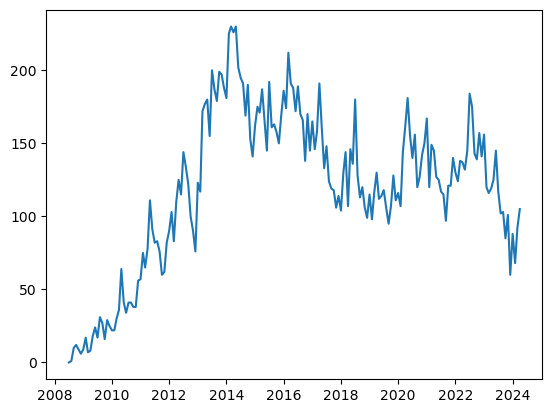

In [110]:
plt.plot(reshaped_df.index, reshaped_df.lua)

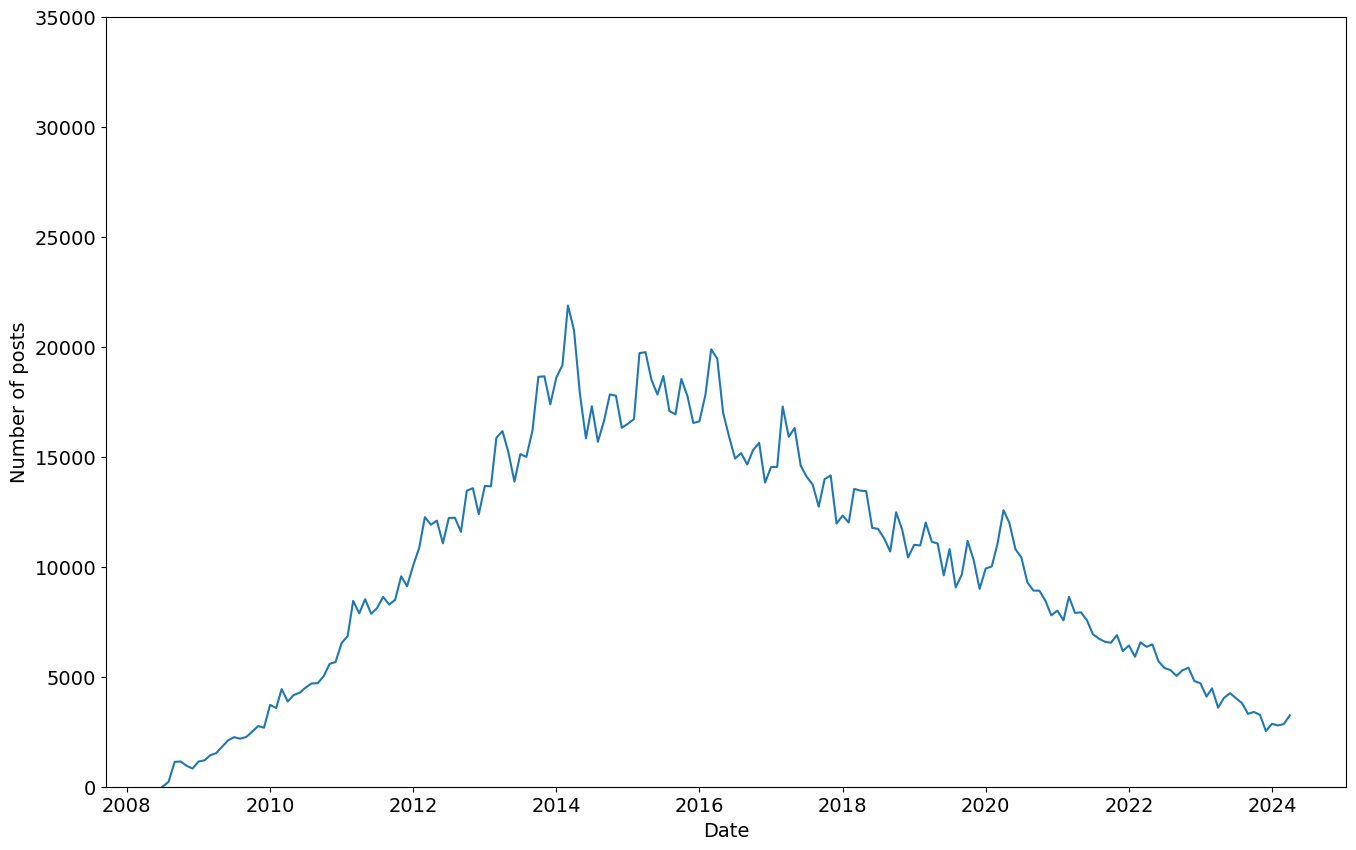

In [111]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

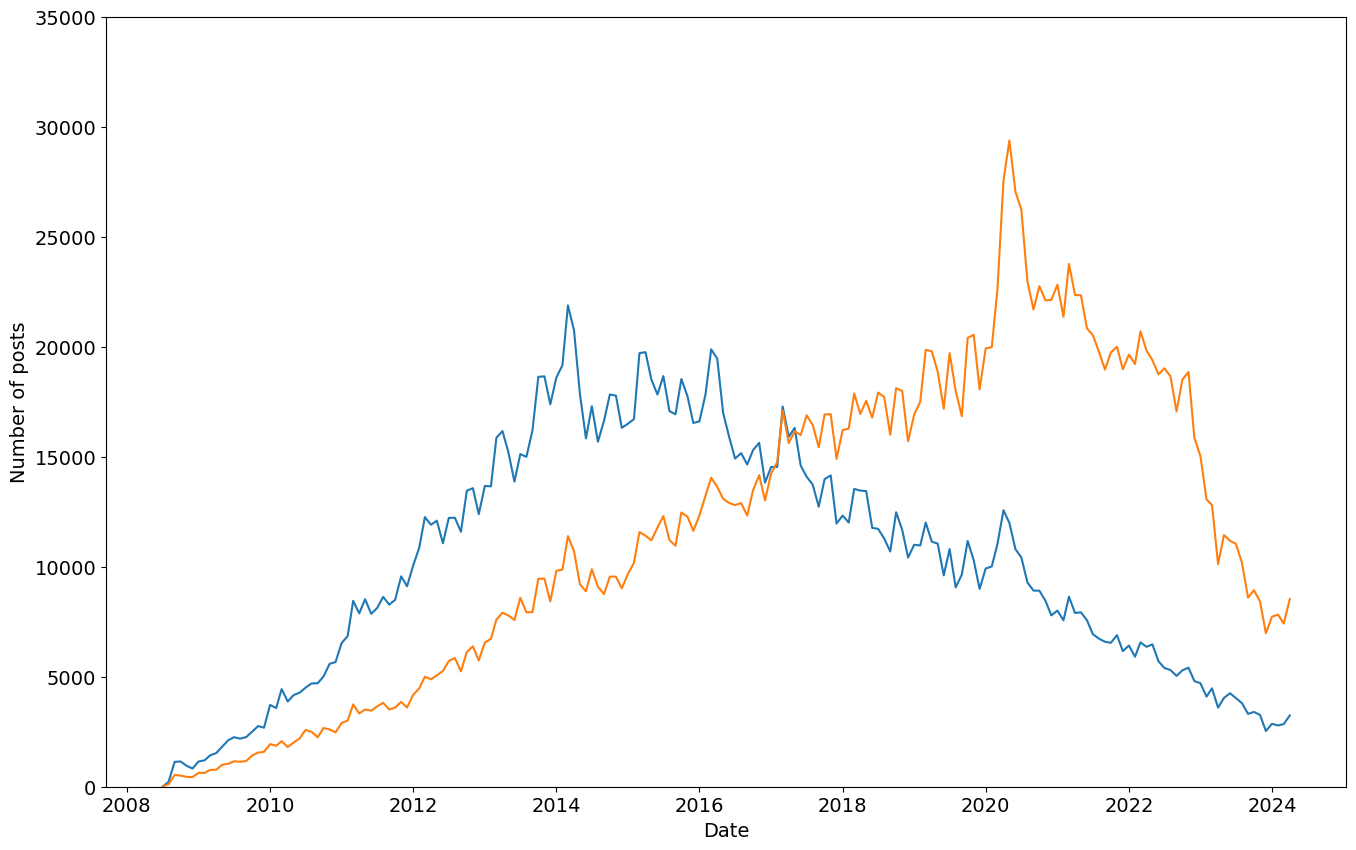

In [112]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

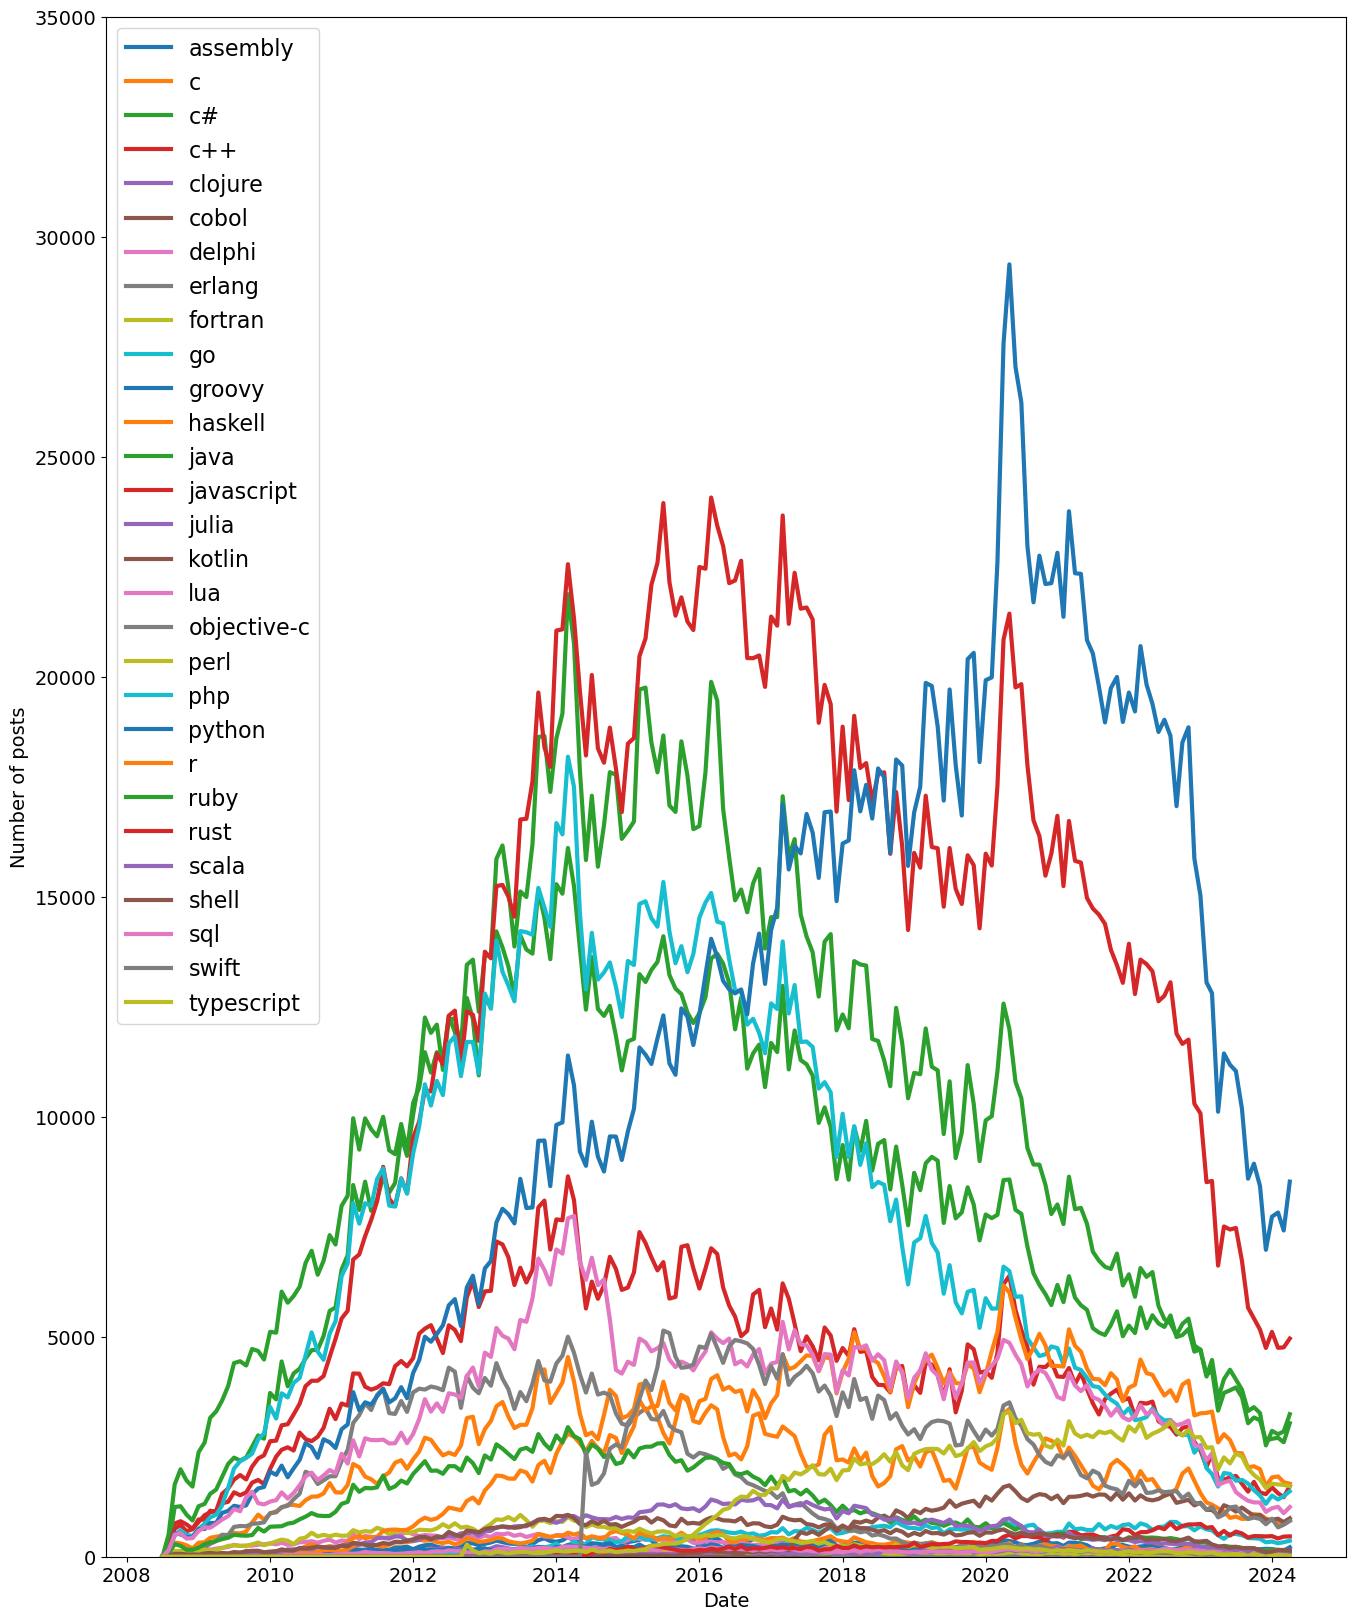

In [119]:
plt.figure(figsize=(16, 20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

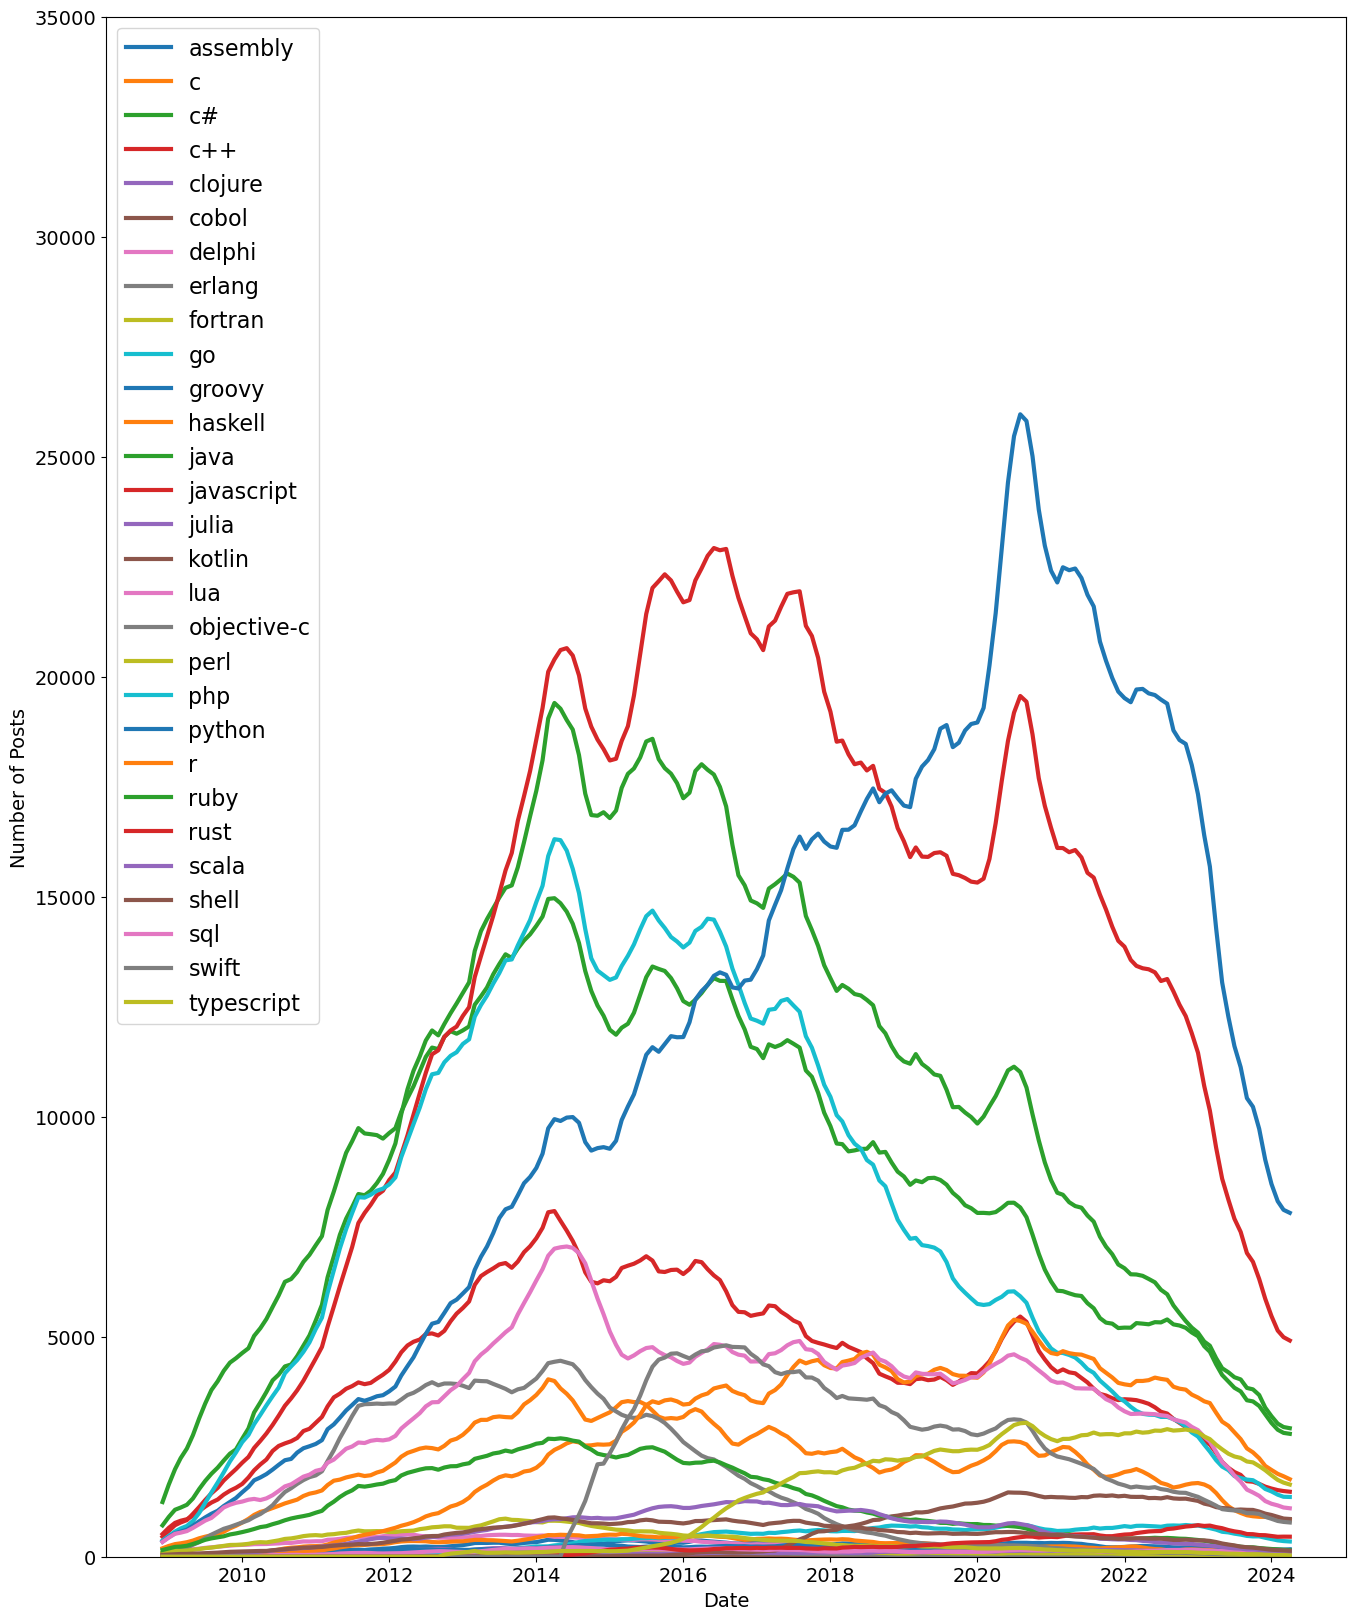

In [121]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

Learning Points & Summary

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've:

* used .groupby() to explore the number of posts and entries per programming language
* converted strings to Datetime objects with to_datetime() for easier plotting
* reshaped our DataFrame by converting categories to columns using .pivot()
* used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()
* created (multiple) line charts using .plot() with a for-loop
* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.
* added a legend to tell apart which line is which by colour
* smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.

Well done for completing today's lessons! Have a good rest. I'll see you tomorrow! 

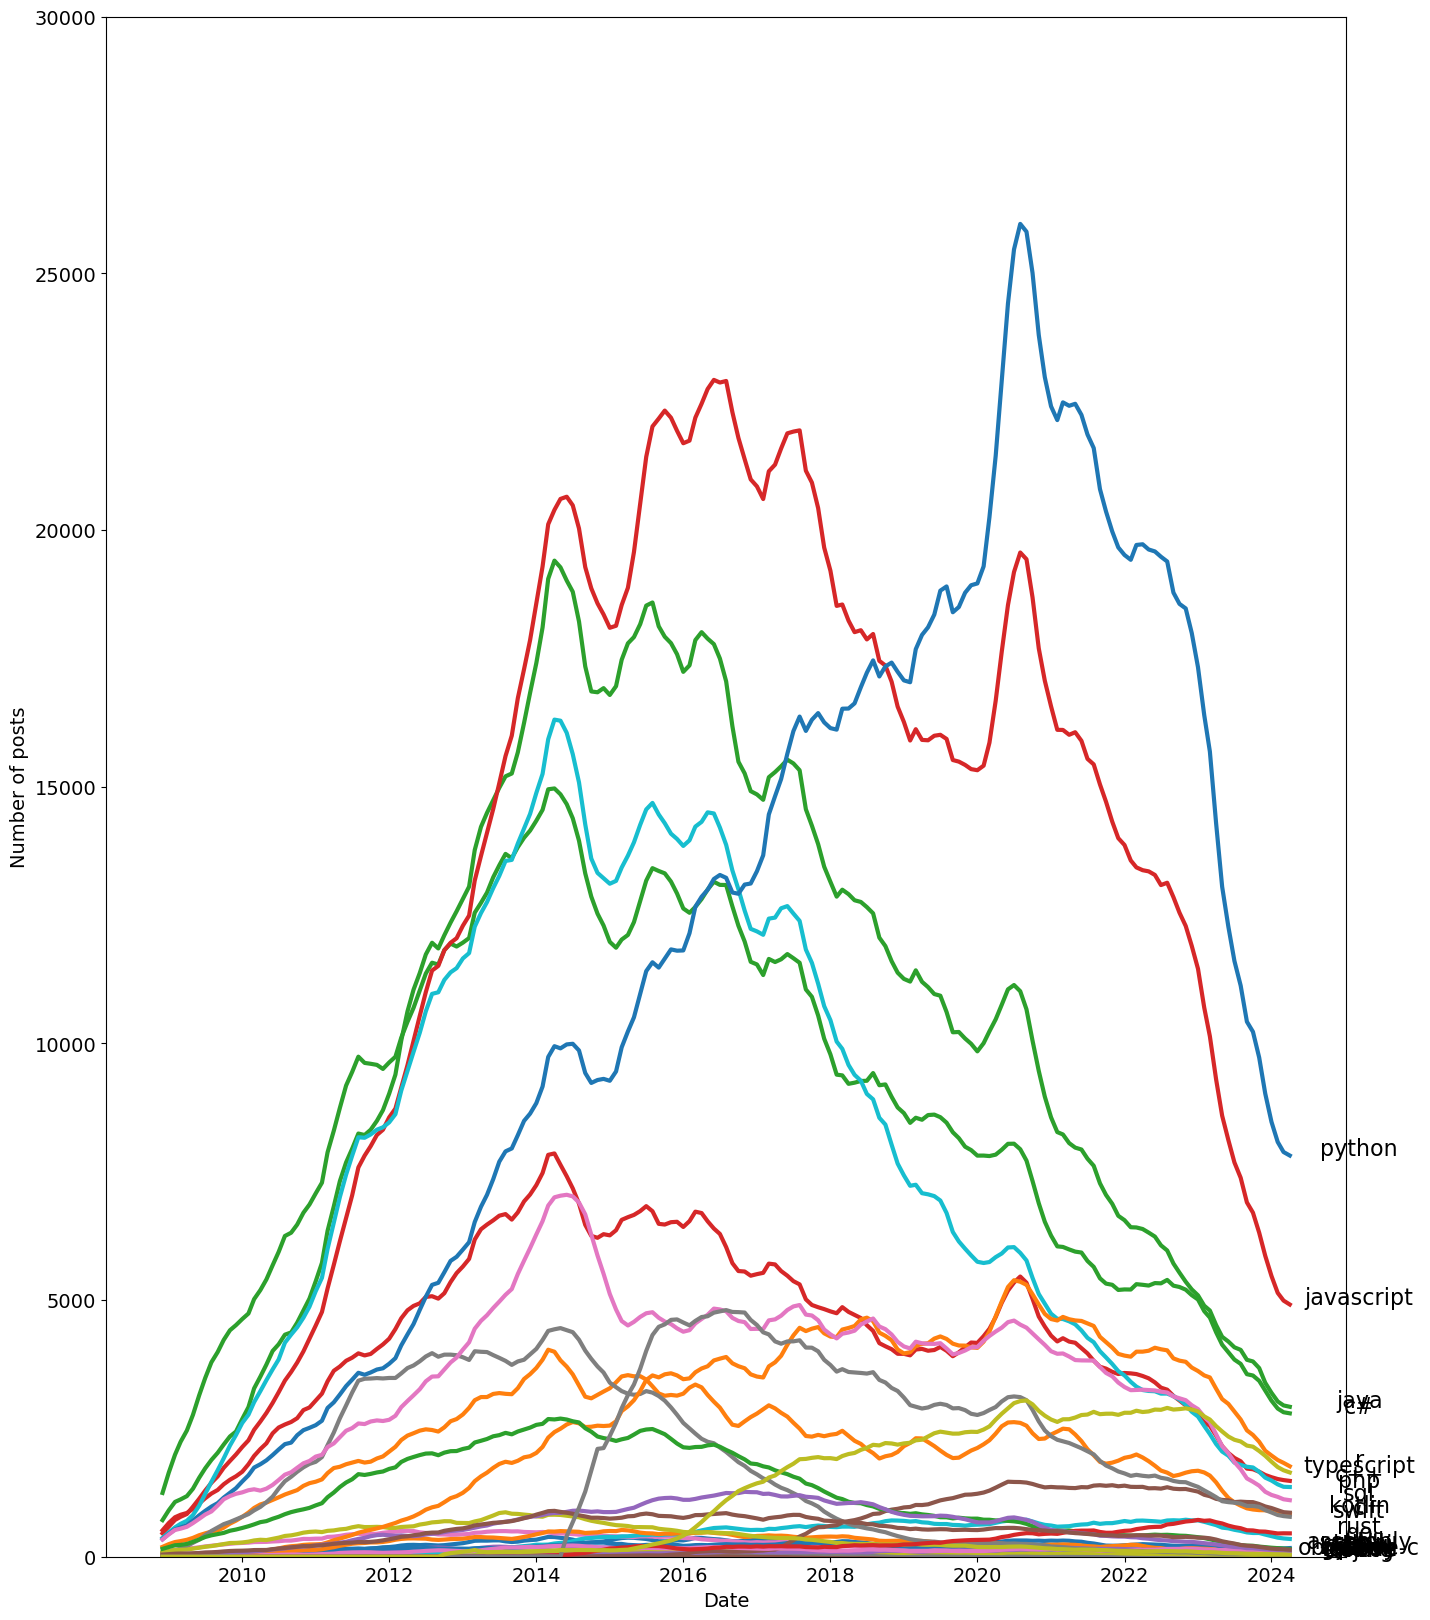

In [147]:
plt.figure(figsize=(16, 20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 30000)

lines = []  # to store the lines for annotation
labels = []  # to store the labels for annotation

for column in roll_df.columns:
    line, = plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
    lines.append(line)
    labels.append(reshaped_df[column].name)

wat = 50
# Annotate each line with its corresponding label
for line, label in zip(lines, labels):
    y = line.get_ydata()[-1]
    plt.annotate(label, (reshaped_df.index[-1], y), textcoords="offset points", xytext=(50,0), ha='center', fontsize=16)

plt.show()